In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [54]:
df = pd.read_csv("lsa64_dataset_best.csv")

In [55]:
df

,Unnamed: 0.1,Unnamed: 0,category,video_name,frame,hand_0_wrist_x,hand_0_wrist_y,hand_0_wrist_z,hand_0_thumb_cmc_x,hand_0_thumb_cmc_y,...,pose_left_heel_y,pose_left_heel_z,pose_right_foot_index_x,pose_right_foot_index_y,pose_right_foot_index_z,pose_left_foot_index_x,pose_left_foot_index_y,pose_left_foot_index_z,missing_hand,missing_face
0,23150,23150,5,005_001_001.mp4,0,0.420772,0.550836,1.636182e-07,0.443854,0.542178,...,1.827304,0.441803,0.538584,1.896927,0.008400,0.443128,1.888999,0.146504,False,False
1,23151,23151,5,005_001_001.mp4,1,0.421121,0.563831,1.745975e-07,0.440999,0.549937,...,1.824616,0.554366,0.534780,1.899688,0.126206,0.439994,1.889553,0.243100,False,False
2,23152,23152,5,005_001_001.mp4,2,0.420025,0.567050,1.688192e-07,0.440097,0.550066,...,1.828198,0.650777,0.546780,1.903675,0.207621,0.449782,1.897125,0.322711,False,False
3,23153,23153,5,005_001_001.mp4,3,0.419329,0.569760,1.583114e-07,0.440057,0.551531,...,1.828721,0.657948,0.549568,1.905399,0.212084,0.451675,1.900439,0.327484,False,False
4,23154,23154,5,005_001_001.mp4,4,0.418654,0.571615,1.575574e-07,0.439785,0.553101,...,1.829020,0.602851,0.554763,1.906695,0.182242,0.456765,1.902547,0.282989,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61615,18055,18055,3,003_010_005.mp4,113,0.425657,0.534980,1.647184e-07,0.441462,0.565812,...,1.912102,0.448031,0.470084,2.008406,-0.060018,0.377270,1.979426,0.118266,False,False
61616,18056,18056,3,003_010_005.mp4,114,0.425624,0.535997,1.647716e-07,0.441336,0.566124,...,1.911224,0.435046,0.468588,2.008240,-0.058428,0.375483,1.978823,0.112068,False,False
61617,18057,18057,3,003_010_005.mp4,115,0.424986,0.536302,1.625014e-07,0.440926,0.566188,...,1.911721,0.403390,0.467247,2.008238,-0.061164,0.372336,1.978815,0.085725,False,False
61618,18058,18058,3,003_010_005.mp4,116,0.424861,0.536518,1.643235e-07,0.441036,0.566482,...,1.910918,0.399239,0.466432,2.007564,-0.060832,0.371874,1.977763,0.078122,False,False


In [56]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'category', 'video_name', 'frame',
       'hand_0_wrist_x', 'hand_0_wrist_y', 'hand_0_wrist_z',
       'hand_0_thumb_cmc_x', 'hand_0_thumb_cmc_y',
       ...
       'pose_left_heel_y', 'pose_left_heel_z', 'pose_right_foot_index_x',
       'pose_right_foot_index_y', 'pose_right_foot_index_z',
       'pose_left_foot_index_x', 'pose_left_foot_index_y',
       'pose_left_foot_index_z', 'missing_hand', 'missing_face'],
      dtype='object', length=1630)

In [57]:
hand_columns = [i for i in df.columns if i.startswith("hand_")]
face_columns = [i for i in df.columns if i.startswith("face_")]

In [58]:
df["missing_hand"] = eval(" & ".join([f"(df['{h}'] == 0)" for h in hand_columns]))

In [59]:
df["missing_face"] = eval(" & ".join([f"(df['{h}'] == 0)" for h in face_columns]))

In [60]:
df[["missing_hand", "missing_face"]].value_counts()

missing_hand  missing_face
False         False           61146
True          False             309
False         True              165
dtype: int64

In [61]:
total_frames = len(df)
total_videos = len(df["video_name"].unique())

missing_face = len(df[df["missing_face"]])
missing_face_percent = round(missing_face/total_frames * 100, 2)
missing_face_frame_median = df[df["missing_face"] == True]["frame"].median()
missing_face_video_count = len(df[df["missing_face"] == True]["video_name"].unique())
missing_face_video_percent = round(missing_face_video_count/total_videos * 100, 2)

missing_hand = len(df[df["missing_hand"]])
missing_hand_percent = round(missing_hand/total_frames * 100, 2)
missing_hand_frame_median = df[df["missing_hand"] == True]["frame"].median()
missing_hand_video_count = len(df[df["missing_hand"] == True]["video_name"].unique())
missing_hand_video_percent = round(missing_hand_video_count/total_videos * 100, 2)


print("Total frames:", total_frames)
print("Total videos:", total_videos)
print()
print(f"Frames missing face: {missing_face} ({missing_face_percent}%)")
print(f"Median Frame missing face: {missing_face_frame_median}")
print(f"Videos missing face: {missing_face_video_count} ({missing_face_video_percent}%)")
print()
print(f"Frames missing hand: {missing_hand} ({missing_hand_percent}%)")
print(f"Median Frame missing hand: {missing_hand_frame_median}")
print(f"Videos missing hand: {missing_hand_video_count} ({missing_hand_video_percent}%)")

Total frames: 61620
Total videos: 500

Frames missing face: 165 (0.27%)
Median Frame missing face: 73.0
Videos missing face: 27 (5.4%)

Frames missing hand: 309 (0.5%)
Median Frame missing hand: 43.0
Videos missing hand: 25 (5.0%)


Text(0, 0.5, 'Video Count')

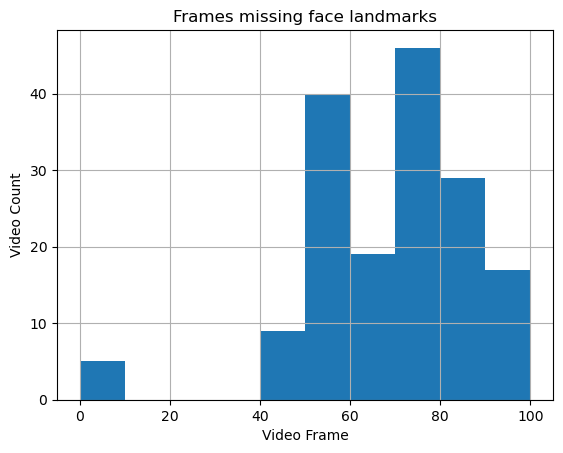

In [62]:
df[df["missing_face"] == True]["frame"].hist()
plt.title("Frames missing face landmarks")
plt.xlabel("Video Frame")
plt.ylabel("Video Count")

Text(0, 0.5, 'Video Count')

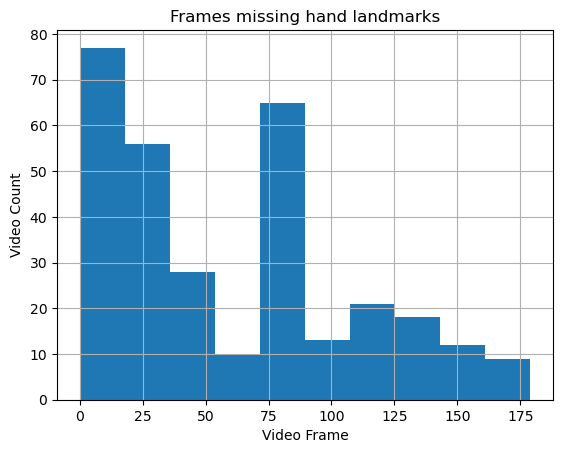

In [63]:
df[df["missing_hand"] == True]["frame"].hist()
plt.title("Frames missing hand landmarks")
plt.xlabel("Video Frame")
plt.ylabel("Video Count")

Text(0, 0.5, 'Frame Count')

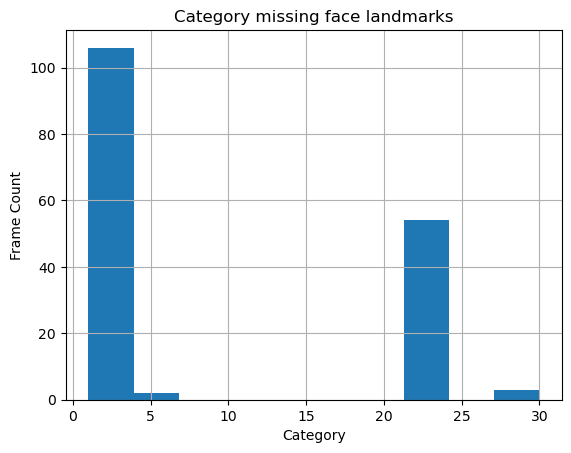

In [64]:
df[df["missing_face"] == True]["category"].hist()
plt.title("Category missing face landmarks")
plt.xlabel("Category")
plt.ylabel("Frame Count")

Text(0, 0.5, 'Frame Count')

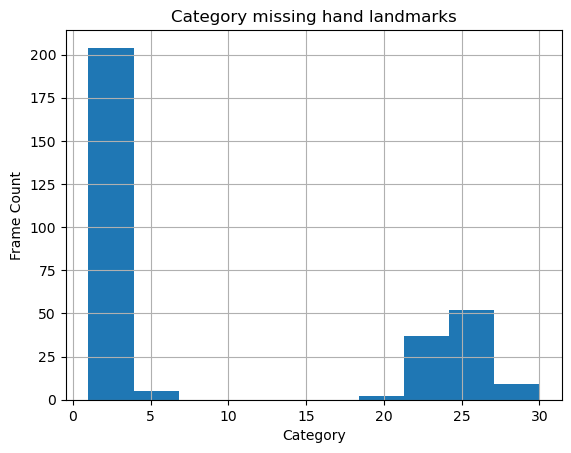

In [65]:
df[df["missing_hand"] == True]["category"].hist()
plt.title("Category missing hand landmarks")
plt.xlabel("Category")
plt.ylabel("Frame Count")

In [66]:
print("Classes without hand problems:", 10 - len(df[df["missing_hand"] == True]["category"].unique()))

Classes without hand problems: 2
